<a href="https://colab.research.google.com/github/lahirurane/UTS_ML2019_A2/blob/master/UTS_ML2019_A2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2

##DATA ANALYTICS PROJECT

###**BUSINENESS PROBLEM**

E-commerce has boomed exponentially from 2014 to 2020 by 200%. With increase of sale, companies are able to reach customers globally. Companies started facing issues in handling customer complaint. The companies must analyse millions of feedback which is humanly impossible. The companies like Amazon, Flipkart started using Text analysis technique to analyse customer’s feedback. The technique helps to analyse feedbacks and find out whether customer are positive or negative about the products. It is critical to evaluate the customers’ reviews as it will decide the organizations’ business decision. That’s why, it is very critical to get customer feedback, clean it, analyse it and visualize it. The visualization should be in a way that non-technical professions can understand it. Once data is visualized, the organization can re-evaluate the business strategies. After changing the business strategies, again the engineer collects text data and runs through same cycle. By doing that, the company can continuously update the product based on customers’ negative feedback.

It is required to define the business before defining business problem. E-Commerce organization like Amazon, Flipkart sell products of all brands. Amazon sell their own Amazon certified products as well. On the website, it allows users to provide feedback. Based on the feedback, it improvise the products. Our aim in the report is to use sentiment analysis on customers’ feedback by working on data uploaded on Kaggle. We chose to work on text analysis as we have seen that by reviewing text analysis, small and medium companies have improved the service/product. It can be done for giant company like Amazon as well. The sentimental analysis will give big boost and eliminate the customer’s pain. Here, we are focusing on Amazon's Echo product. 

Definition of Sentimental Analysis: 

It is a method to analysis text data by converting in a data such that machine can understand the language and gives meaningful visualization. The visualization is then can be helpful for choosing the strategies.

Thus the problem statement is: 'Sentimental analysis on Amazon Product using data extracted Amazon feedback.' The statement is broken into sub-business problem as written below:



This analysis will help the business heads in analyzing customer's feeling for Amazon Echo. It can be useful when Amazon wants to launch same product with upgraded features, it will be helpful.



###DATA MINING PROBLEM

  Predictive Analysis, Machine Learning, Data Mining, and Big Data techniques have been adopted to analyse and classify the tweets.

In [7]:
from google.colab import files
from IPython.display import Image
Image('Framework.jpg', width =525)

The Data Analysis part comprises of two phases:


1.   Data Cleaning Phase: The data which we got from Kaggle (https://www.kaggle.com/sid321axn/amazon-alexa-reviews) has been cleaned. This part will be discussed in the report later.
2.   Predictive Analysis: To analyze and predict dataset accurately , we will make a model which helps us to visualize the data. The figure of the model is shown as below in the figure.



In [8]:
Image('Steps.png', width =525)

##'Python' Programming Language

It is an open source programming language, being used in industry for text/data analysis. We will be using Python through out the model. Next section, we will explain the codes. 

Below are the libraries being used:


1.   Pandas: Library is used for data read, write ,and manipulation.
2.   numpy: It is general purpose array processing package.
4.   Seaborn: Plotting a graph and visualization in the report.
5.   WordCloud: For displaying wordcloud in later part of the section




In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator

In [10]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
%cd /gdrive/My Drive/datasets



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/datasets


The above code will mount the Google Drive where the dataset extracted from Kaggle. It asks for authorization code. We need to click on the URL mentioned in the output and allow Colab to access Google Drive. Once authorization is given, copy the code and it will load the data in Colab.

Load Data

In [11]:
dataset = pd.read_csv('./amazon_alexa.tsv', delimiter='\t')
dataset.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [0]:
dataset['review_item_length'] = dataset.verified_reviews.apply(lambda x: len(x))

Function to remove patters from text

In [0]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

punctuations, numbers and special characters do not help much

In [0]:
# remove special characters, numbers, punctuations
dataset['review_clear'] = dataset['verified_reviews'].str.replace("[^a-zA-Z#]", " ")

Lower case

In [0]:
dataset['review_clear'] = dataset.review_clear.apply(lambda x: x.lower())

In [16]:
print('The mean for the length of review:',dataset['review_item_length'].mean())
print('The standard deviation for the length of reviews:',dataset['review_item_length'].std())
print('The maximum for the length of reviews:',dataset['review_item_length'].max())

The mean for the length of review: 132.0495238095238
The standard deviation for the length of reviews: 182.0999522038919
The maximum for the length of reviews: 2851


Text(0.5, 1.0, 'Distribution of review text length')

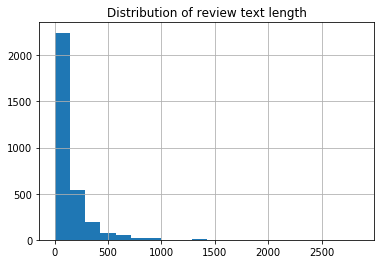

In [17]:
dataset['review_item_length'].hist(bins=20)
plt.title('Distribution of review text length')

Convert Data format

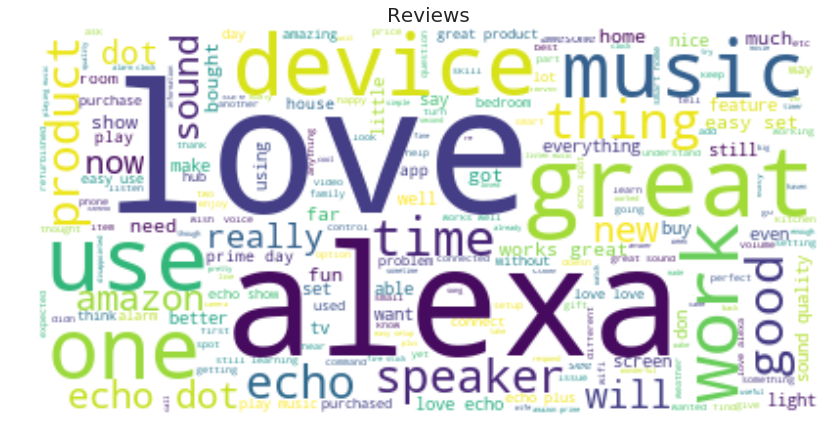

In [18]:
np.random.seed(321)
sns.set(rc={'figure.figsize':(14,8)})
reviews = ' '.join(dataset['review_clear'].tolist())

wordcloud = WordCloud(background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews',size=20)
plt.show()

Text(0.5, 1.0, 'Counts of each variation')

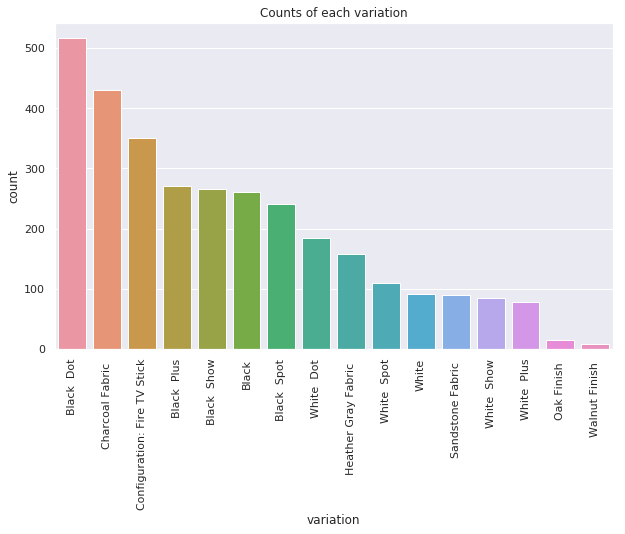

In [19]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(dataset.variation,
              order = dataset['variation'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Counts of each variation')

In [20]:
dataset.rating.value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [0]:
data5 = dataset[dataset.rating == 5]
data_not_5 = dataset[dataset.rating != 5]
data1 = dataset[dataset.rating == 1]

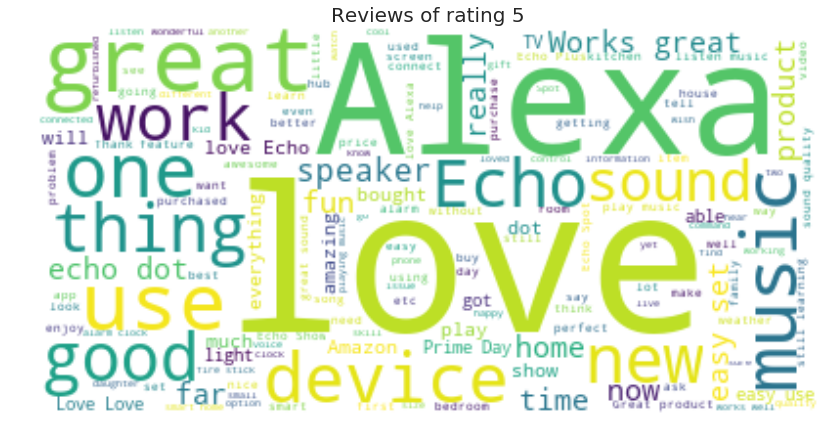

In [22]:
sns.set(rc={'figure.figsize':(14,8)})
reviews = ' '.join(data5['verified_reviews'].tolist())

wordcloud = WordCloud(background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews of rating 5',size=20)
plt.show()

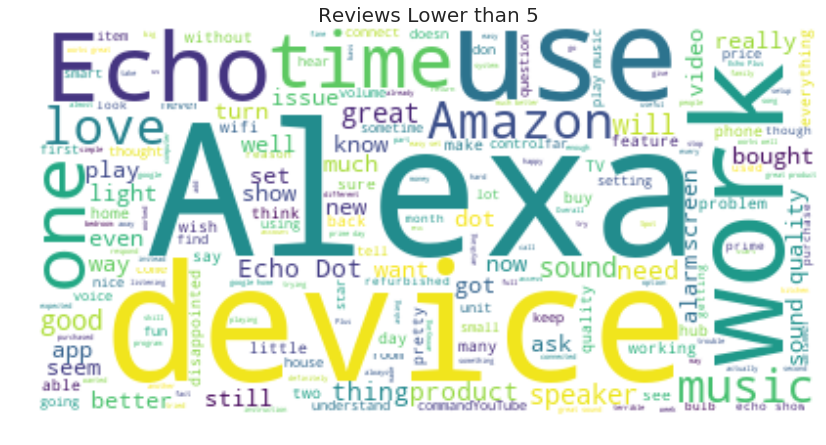

In [23]:
sns.set(rc={'figure.figsize':(14,8)})
reviews = ' '.join(data_not_5['verified_reviews'].tolist())

wordcloud = WordCloud(background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews Lower than 5',size=20)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

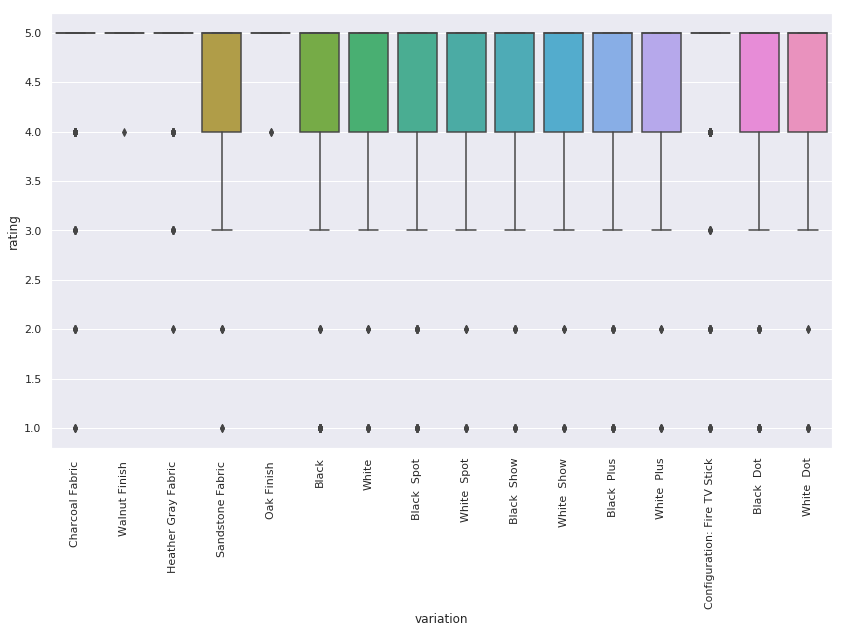

In [24]:
sns.boxplot(dataset.variation, dataset.rating)
plt.xticks(rotation = 90)

In [0]:
dataset['positive'] = 0
dataset.loc[dataset['rating'] ==5, 'positive'] = 1

y = dataset['positive']

In [26]:
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('punkt')
nltk.download('stopwords')

word_tokenize(dataset.verified_reviews[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['Love', 'my', 'Echo', '!']

In [0]:
from nltk.corpus import stopwords 

stop_words = set(stopwords.words('english')) 

#Tokenize words
dataset['review_clear'] = dataset.verified_reviews.apply(lambda x: word_tokenize(x))

#remove stop words 
dataset['review_clear'] = dataset.review_clear.apply(lambda x: [w for w in x if w not in stop_words])

from nltk.stem import PorterStemmer
ps = PorterStemmer() 
  
# choose some words to be stemmed 
dataset['review_clear'] = dataset.review_clear.apply(lambda x: [ps.stem(w) for w in x])
 

#append sentence
dataset['review_clear'] = dataset.review_clear.apply(lambda x: ' '.join(x))


In [28]:
dataset.head()

,rating,date,variation,verified_reviews,feedback,review_item_length,review_clear,positive
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,love echo !,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,love !,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,"sometim play game , answer question correctli ...",0
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,"I lot fun thing . My 4 yr old learn dinosaur ,...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,music,1


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 8 columns):
rating                3150 non-null int64
date                  3150 non-null object
variation             3150 non-null object
verified_reviews      3150 non-null object
feedback              3150 non-null int64
review_item_length    3150 non-null int64
review_clear          3150 non-null object
positive              3150 non-null int64
dtypes: int64(4), object(4)
memory usage: 197.0+ KB


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# creating bag of words for training bag-of-words feature matrix
bagOfWords = bow_vectorizer.fit_transform(dataset['review_clear'])
print("bow",bagOfWords)


bow   (0, 511)	1
  (0, 273)	1
  (1, 511)	1
  (2, 815)	1
  (2, 633)	1
  (2, 359)	1
  (2, 47)	2
  (2, 680)	1
  (2, 203)	1
  (2, 36)	1
  (2, 755)	1
  (2, 372)	1
  (2, 991)	1
  (2, 489)	1
  (2, 11)	1
  (2, 916)	1
  (2, 488)	1
  (2, 76)	1
  (2, 404)	1
  (3, 633)	2
  (3, 359)	1
  (3, 489)	1
  (3, 488)	1
  (3, 508)	1
  (3, 354)	1
  :	:
  (3148, 823)	1
  (3148, 550)	1
  (3148, 46)	1
  (3148, 827)	1
  (3148, 932)	1
  (3148, 377)	1
  (3148, 517)	1
  (3148, 206)	1
  (3148, 797)	1
  (3148, 175)	1
  (3148, 860)	1
  (3148, 678)	2
  (3148, 351)	1
  (3148, 263)	2
  (3148, 407)	2
  (3148, 464)	1
  (3148, 182)	1
  (3148, 545)	1
  (3148, 586)	1
  (3148, 69)	1
  (3148, 477)	1
  (3148, 844)	1
  (3148, 110)	1
  (3148, 532)	1
  (3149, 370)	1


In [0]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# # TF-IDF feature matrix
# tfidf = tfidf_vectorizer.fit_transform(dataset['review_clear'])
# print("tfidf",tfidf)


Split Dataset for training

In [0]:
X_train, X_test, y_train, y_test = train_test_split(bagOfWords, y, test_size=0.33
                                    ,random_state=53)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score , confusion_matrix



# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(X_train, y_train, random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8820116054158608

In [33]:

test_pred = lreg.predict_proba(X_test)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
#dataset['positive'] = test_pred_int
#submission = test[['id','positive']]


score = accuracy_score(y_test, test_pred_int)
print('Accuracy is:',score)
f1 = f1_score(y_test, test_pred_int)
print('F score is:',f1)

Accuracy is: 0.7855769230769231
F score is: 0.8660660660660662


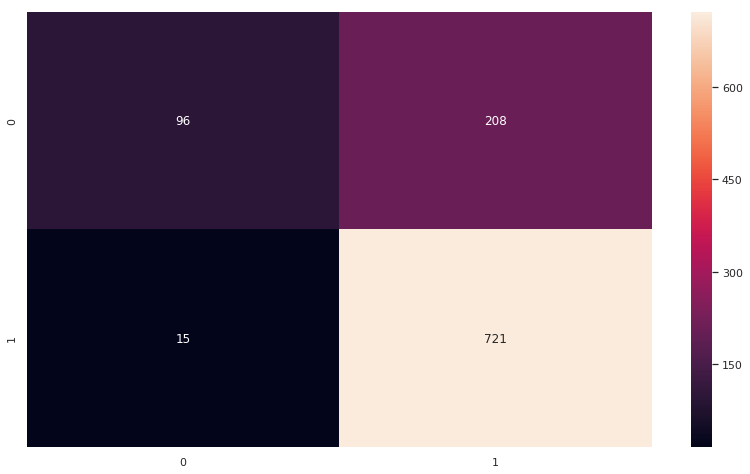

In [34]:

sns.heatmap(confusion_matrix(y_test,test_pred_int), annot=True,fmt='2.0f')

In [35]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score

xg_reg = xgb.XGBRegressor()

xg_reg.fit(xtrain_bow, ytrain)

xg_preds = xg_reg.predict(xvalid_bow)

predictions = [round(value) for value in xg_preds]
# evaluate predictions
accuracy = accuracy_score(yvalid, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[08:55:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 78.67%


https://machinelearningmastery.com/evaluate-gradient-boosting-models-xgboost-python/

In [36]:

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(xtrain_bow, ytrain)
nb_preds = clf.predict(xvalid_bow)
f1_score(yvalid, nb_preds)

0.8812877263581489

In [37]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(xtrain_bow, ytrain)  
svm_predict = clf.predict(xvalid_bow)

f1_score(yvalid, svm_predict)

0.8801534036433366

## Analysis using Lexicon and Rule Based

Import Lexcion Library 'vaderSentiment'
(https://github.com/cjhutto/vaderSentiment)

In [38]:
!pip install vaderSentiment


In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()


Defining Score method

In [0]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

Calcualting score for review comment

In [0]:
x = []
y = []

for review_comment in dataset.review_clear:
  item = sentiment_analyzer_scores(review_comment)
  
  x.append(item['neg'])
  y.append(item['pos'])


Plot Analysis result

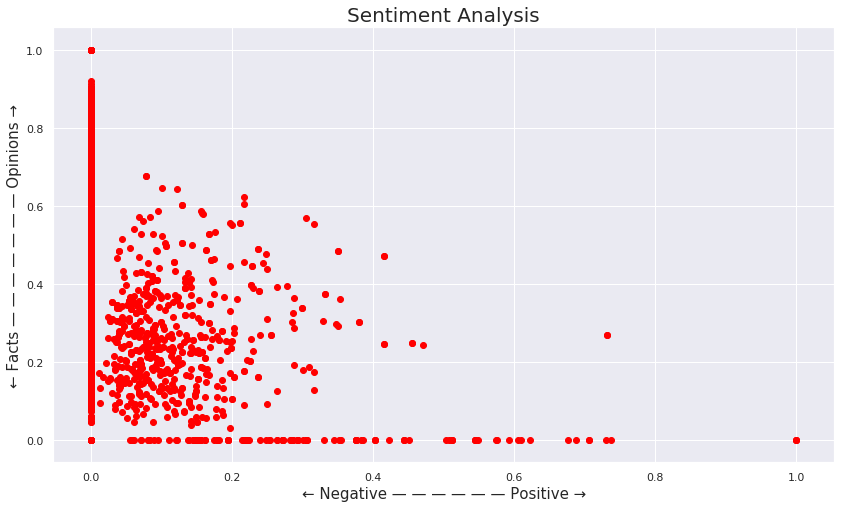

In [42]:
plt.scatter(x, y, color='Red')
plt.title('Sentiment Analysis', fontsize = 20)
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)
plt.show()

Github URL : https://github.com/lahirurane/UTS_ML2019_A2/blob/master/UTS_ML2019_A2_.ipynb